In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [5]:
x_train_reshaped = x_train_scaled.reshape(60000, 28*28)
x_test_reshaped = x_test_scaled.reshape(10000, 28*28)



In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28),name='flatten'),
    keras.layers.Dense(units=300,activation='relu',name='hidden_layer2'),
    keras.layers.Dense(units=10, activation='softmax', name='output_layer')])

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [21]:
model.fit(x_train_scaled, y_train, epochs=10,validation_data=(x_test_scaled, y_test),callbacks=[early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.8924 - loss: 0.3688 - val_accuracy: 0.9660 - val_loss: 0.1071
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9712 - loss: 0.0960 - val_accuracy: 0.9726 - val_loss: 0.0854
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9824 - loss: 0.0554 - val_accuracy: 0.9728 - val_loss: 0.0853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0402 - val_accuracy: 0.9793 - val_loss: 0.0693
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0262 - val_accuracy: 0.9781 - val_loss: 0.0762
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9794 - val_loss: 0.0723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9769 - val_loss: 0.0834
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
final_train_predictions = np.argmax(model.predict(x_train_scaled), axis=1)
final_test_predictions = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_train, final_train_predictions))
print(classification_report(y_test, final_test_predictions))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       0.99      1.00      0.99      6742
           2       1.00      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       1.00      0.99      0.99      5421
           6       0.99      1.00      0.99      5918
           7       0.99      1.00      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99     

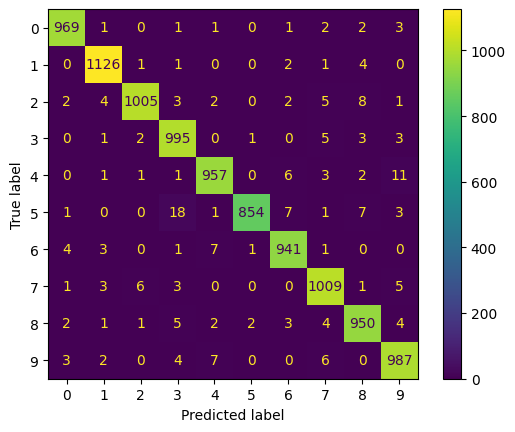

In [25]:
cm=confusion_matrix(y_test, final_test_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

In [26]:
cm=confusion_matrix(x_train_scaled, final_test_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]